In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

mytisse_data = pd.read_csv("data/data_cleaned.csv", sep=";")
mytisse_clust = mytisse_data.drop(columns=['id', 'part_id', 'q1', 'q3_justification', 'q6', 'q7', 'q8', 'q11'])

mapping = {'Palette A': 0, 'Palette B': 1}
mapping_arth = {'No': 0, 'Yes, in high school': 1, 'Yes, at university': 1, 'Yes, in other contexts': 1}
mytisse_clust['q3'] = mytisse_clust['q3'].map(mapping)
mytisse_clust['q9'] = mytisse_clust['q9'].map(mapping_arth)

mytisse_clust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   group_id         24 non-null     object 
 1   q2_music_dance   24 non-null     float64
 2   q2_war           24 non-null     int64  
 3   q2_color         24 non-null     int64  
 4   q2_conservation  24 non-null     int64  
 5   q2_cubism        24 non-null     float64
 6   q3               24 non-null     int64  
 7   q4_anger         24 non-null     int64  
 8   q4_disgust       24 non-null     int64  
 9   q4_fear          24 non-null     int64  
 10  q4_interest      24 non-null     int64  
 11  q4_joy           24 non-null     int64  
 12  q4_sadness       24 non-null     float64
 13  q4_surprise      24 non-null     int64  
 14  q4_trust         24 non-null     int64  
 15  q5               24 non-null     int64  
 16  q9               24 non-null     int64  
 17  q10_anger        2

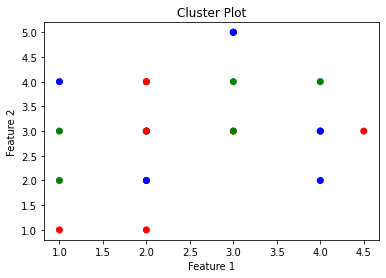

In [5]:
# Extract the group column (assuming it is the first column)
group_column = mytisse_clust.iloc[:, 0]

# Extract the feature columns
feature_columns = mytisse_clust.iloc[:, 1:]  # Assuming the features start from the second column

# Replace NaN values with 0
feature_columns.fillna(0, inplace=True)

# Perform k-means clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(feature_columns)

# Get the cluster labels
labels = kmeans.labels_

# Assign colors to the groups
colors = {'A': 'green', 'B': 'blue', 'C': 'red'}
group_colors = [colors.get(group, 'gray') for group in group_column]

# Plot the clusters
plt.scatter(feature_columns.iloc[:, 0], feature_columns.iloc[:, 1], c=group_colors)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Cluster Plot')
plt.show()